# Computer Vision - P3

## Delivery

Your overall grading will be penalized if the following requirements are not fulfilled:

- Implemented code should be commented exhaustively and in **English**.

- The questions introduced in the exercises must be answered.

- Add title to the figures to explain what is displayed.

- Answers to questions also need to be in **English**.

- Make sure to print and plot exactly what it is indicated. If a reference image is provided, your output is expected to be exactly the same unless instructed differently.

- The deliverable of both parts must be a file named **P3_Student1_Student2.zip** that includes:
    - The notebook P3_Student1_Student2.ipynb completed with the solutions to the exercises and their corresponding comments.
    - All the images used in this notebook (upload the ones that were not provided)
    
- It is required that your code can be run by us without need of any modification and without getting any errors.

- Use packages and solutions that were covered in your class and tutorials. If you are unsure about using a particular package, you should seek clarification from your instructor to confirm whether it is allowed.

- Please refrain from utilizing resources like ChatGPT to complete this lab assignment.

**Deadline (Campus Virtual): Group A & F: November 14th, 23:00 h; Group B: November 14th, 23:00 h**

==============================================================================================
## Practicum 3: Image and Video Segmentation

==============================================================================================

The main topics of Laboratory 3 are:

3.1. Segmentation of video shots with static scenes.

3.2. Background subtraction.

3.3. Segmentation of images.

The following chapters of the book “Computer Vision: Algorithms and Applicatons” from Richard Szeliski have further information about the topic:

* Chapter 4: Computer Vision: Algorithms and Applications.

* Chapter 5: Segmentation.



In [17]:
# Example
import numpy as np
import skimage
from skimage import io
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [18]:
import numpy as np
import skimage
from skimage import io, img_as_float, transform
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from skimage.segmentation import felzenszwalb, mark_boundaries, slic, quickshift
from skimage.transform import resize
from skimage.util import random_noise
from skimage.feature import canny
from skimage.exposure import histogram
from skimage.color import rgb2gray, gray2rgb
from sklearn.cluster import AgglomerativeClustering
from sklearn.feature_extraction.image import grid_to_graph
from matplotlib.animation import FuncAnimation

## 3.1 Segmentation of images

Apply the image segmentation methods (Felzenswhalbs, Slic and Quickshift) based on the clustering of points corresponding to the pixels but in the feature space RGB-XY space.

**Hint**:
- Different image segmentation commands can be found in skimage.segmentation.
- Use the function segmentation.mark_boundaries for seeing the boundaries of the segments.
- Use the inline pluggin to visualize images (%matplotlib inline).

<img src="images_notebook/image_Segmentation.png" width=600>

### Felzenszwalb's efficient graph based segmentation

a) Read 'hogwarts.jpeg' image from the folder 'images' and segment it using the Felzenszwalbs's method. Comment the result.

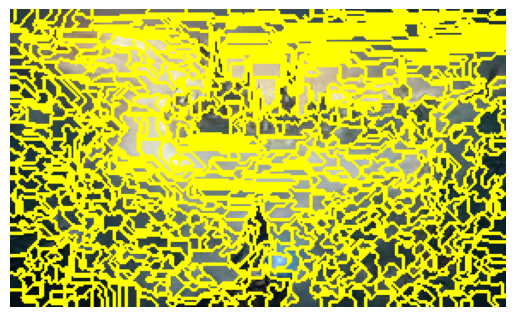

In [3]:
from skimage.segmentation import felzenszwalb, mark_boundaries

hogwarts_image = io.imread("images/hogwarts.jpeg")
hogwarts_felzenswalb = felzenszwalb(hogwarts_image)

plt.imshow(mark_boundaries(hogwarts_image, hogwarts_felzenswalb))
plt.axis('off')
plt.show()

- Areas with smooth gradients, such as clouds, have a higher density of contours due to small differences in hue. On the other hand, more uniform regions, such as the lighter sky, are divided into fewer segments, reflecting their homogeneity. In addition, the castle and the figure in the foreground have been segmented into several parts, highlighting their edges and the contrast with the hazy background.

b) Create a function where you explore at least 3 different parameter combinations in order to obtain a better image segmentation. Your function should receive the image and the set of parameters you would like to change. It should also resize your image to be a third part of the original image size. Your function results should be a visualization of the results and a print of the number of segments.  


Answer the following questions:
- Is it critical to convert the image in grayscale in order to do the image segmentation?
- Is it critical to convert the image in float in order to do the image segmentation?
- Which are the optimal values according to your subjective perception?
- How does each parameter behave?
- Does the image reduction affect the optimal values?

Combination 1: scale=50, sigma=0.5, min_size=20 -> Segments: 65
Combination 2: scale=100, sigma=0.8, min_size=50 -> Segments: 22
Combination 3: scale=200, sigma=1.0, min_size=100 -> Segments: 6


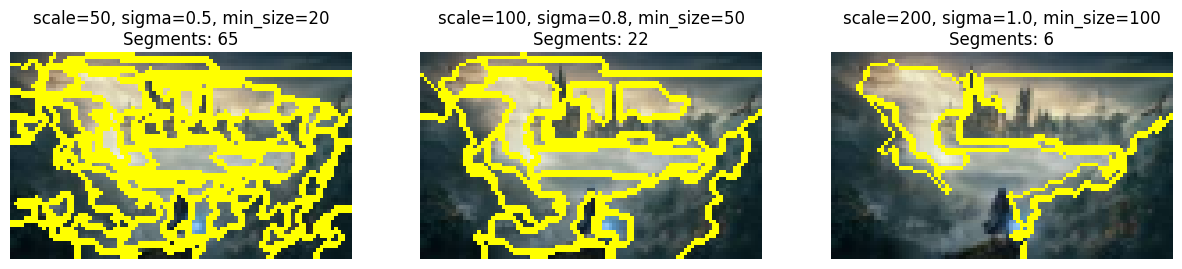

In [4]:
from skimage.segmentation import felzenszwalb, mark_boundaries
from skimage.transform import resize

def explore_segmentation_params(image, params_list):
    """
    Function to explore different parameter combinations for Felzenszwalb's segmentation.

    Parameters:
    - image: Input image (numpy array).
    - params_list: List of dictionaries containing parameter combinations for Felzenszwalb's method.

    Outputs:
    - Displays the segmented images with boundaries and prints the number of segments for each parameter combination.
    """
    # Resize the image to a third of its original size
    image_resized = resize(image, (
        image.shape[0] // 3,
        image.shape[1] // 3
    ), anti_aliasing=True)

    # Create subplots
    fig, axs = plt.subplots(1, len(params_list), figsize=(15, 5))

    for i, params in enumerate(params_list):
        # Apply Felzenszwalb's segmentation with the given parameters
        segments = felzenszwalb(image_resized, scale=params['scale'], sigma=params['sigma'], min_size=params['min_size'])

        # Count the number of segments
        num_segments = len(np.unique(segments))

        # Plot the segmented image with boundaries
        axs[i].imshow(mark_boundaries(image_resized, segments))
        axs[i].set_title(f"scale={params['scale']}, sigma={params['sigma']}, min_size={params['min_size']}\nSegments: {num_segments}")
        axs[i].axis('off')

        # Print the number of segments
        print(f"Combination {i + 1}: scale={params['scale']}, sigma={params['sigma']}, min_size={params['min_size']} -> Segments: {num_segments}")


    plt.show()


# Define the parameter combinations and run the function
params_list = [
    {'scale': 50, 'sigma': 0.5, 'min_size': 20},
    {'scale': 100, 'sigma': 0.8, 'min_size': 50},
    {'scale': 200, 'sigma': 1.0, 'min_size': 100}
]

explore_segmentation_params(hogwarts_image, params_list)

##### Is it critical to convert the image in grayscale in order to do the image segmentation?
- No, it is not critical. The Felzenszwalb method can work directly with RGB images. However, converting to grayscale might be helpful when seeking simpler segmentation.
##### Is it critical to convert the image in float in order to do the image segmentation?
- Yes, it is critical. The Felzenszwalb algorithm expects the image values to be within a specific range (usually [0, 1]), so converting to float is necessary.
##### Which are the optimal values according to your subjective perception?
- For this case, the optimal values are scale=100, sigma=0.8, and min_size=50, as they provide a balance between the number of segments and the visual representation of the content.
##### How does each parameter behave?
- Scale: Higher values result in fewer and larger segments, capturing more global information. Lower values result in more small segments, increasing detail.
- Sigma: Higher values smooth the image more, helping to reduce noise but potentially losing fine details.
- Min_size: Higher values merge smaller segments into larger regions, simplifying the segmentation.
##### Does the image reduction affect the optimal values?
- Yes, image reduction affects the optimal values. Reduced images tend to require higher scale and min_size values to maintain meaningful segmentation due to the loss of detail.

c) Comment the definition of the algorithm (use approximately 3 lines at most), its advantages and disadvantages.

- Felzenszwalb's segmentation models an image as a graph, where pixels are nodes, and edges represent similarity. It merges regions based on thresholds to balance local and global features. The algorithm is efficient but sensitive to parameter selection, which may require adjustments for optimal results.

### SLIC - K-Means based image segmentation
d) Segment the same image using the SLIC image segmentation algorithm using the parameters by default.

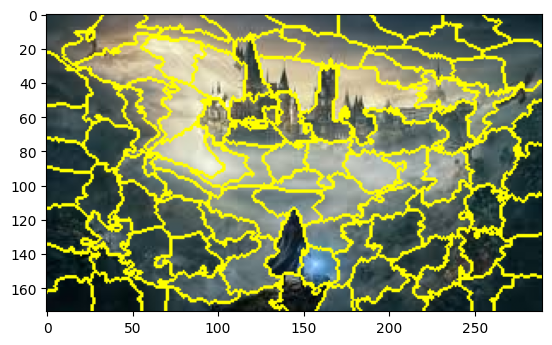

In [5]:
# Your solution here
from skimage.segmentation import slic
segmentation_slices = slic(hogwarts_image)
plt.imshow(mark_boundaries(hogwarts_image, segmentation_slices))

Create a function where you explore at least 3 different parameter combinations in order to obtain a better image segmentation. Your function should receive the image and the set of parameters you would like to change. It should also resize your image to be a third part of the original image size. Your function results should be a visualization of the results and a print of the number of segments.  

Combination 1: n_segments=50, compactness=10, sigma=1 -> Segments: 44
Combination 2: n_segments=100, compactness=20, sigma=2 -> Segments: 112
Combination 3: n_segments=200, compactness=30, sigma=3 -> Segments: 228


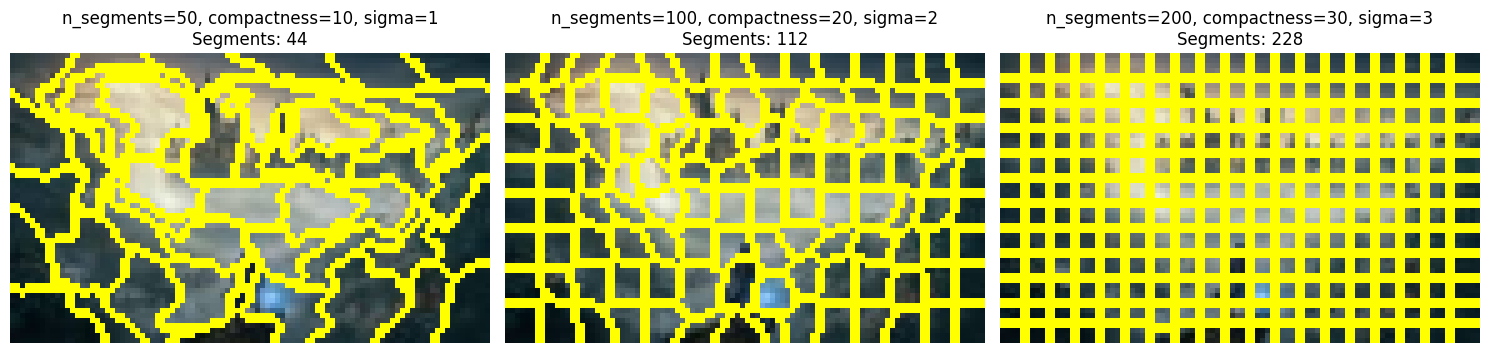

In [6]:
from skimage.util import img_as_float

def explore_slic_params(image, params_list):
    """
    Function to explore different parameter combinations for SLIC segmentation.

    Parameters:
    - image: Input image (numpy array).
    - params_list: List of dictionaries containing parameter combinations for SLIC.

    Outputs:
    - Displays the segmented images with boundaries and prints the number of segments for each parameter combination.
    """
    # Resize the image to a third of its original size
    image_resized = resize(image, (
        image.shape[0] // 3,
        image.shape[1] // 3
    ), anti_aliasing=True)

    # Convert to float for SLIC
    image_resized_float = img_as_float(image_resized)

    fig, axs = plt.subplots(1, len(params_list), figsize=(15, 5))

    for i, params in enumerate(params_list):
        # Apply SLIC segmentation with the given parameters
        segments = slic(
            image_resized_float,
            n_segments=params['n_segments'],
            compactness=params['compactness'],
            sigma=params['sigma'],
            start_label=1
        )

        # Count the number of segments
        num_segments = len(np.unique(segments))

        # Plot the segmented image with boundaries
        axs[i].imshow(mark_boundaries(image_resized, segments))
        axs[i].set_title(f"n_segments={params['n_segments']}, compactness={params['compactness']}, sigma={params['sigma']}\nSegments: {num_segments}")
        axs[i].axis('off')

        # Print the number of segments
        print(f"Combination {i + 1}: n_segments={params['n_segments']}, compactness={params['compactness']}, sigma={params['sigma']} -> Segments: {num_segments}")

    plt.tight_layout()
    plt.show()

# Example usage with the Hogwarts image
params_list = [
    {'n_segments': 50, 'compactness': 10, 'sigma': 1},
    {'n_segments': 100, 'compactness': 20, 'sigma': 2},
    {'n_segments': 200, 'compactness': 30, 'sigma': 3}
]

explore_slic_params(hogwarts_image, params_list)



f) Comment what the algorithm is (in up to 3 lines).

- SLIC (Simple Linear Iterative Clustering) segments an image into superpixels by clustering pixels based on color and spatial proximity. It ensures that regions are compact and uniform, making it efficient and suitable for tasks like object detection or segmentation. Its flexibility lies in tunable parameters like the number of segments and compactness.

### Quickshift image segmentation

g) Segment the original image using the Quickshift algorithm.

Create a loop where you explore kernel_size variations in order to obtain a better image segmentation. Argument why a higher or lower value improves the segmentation results.


Kernel_size=3 -> Segments: 138
Kernel_size=6 -> Segments: 57
Kernel_size=10 -> Segments: 33


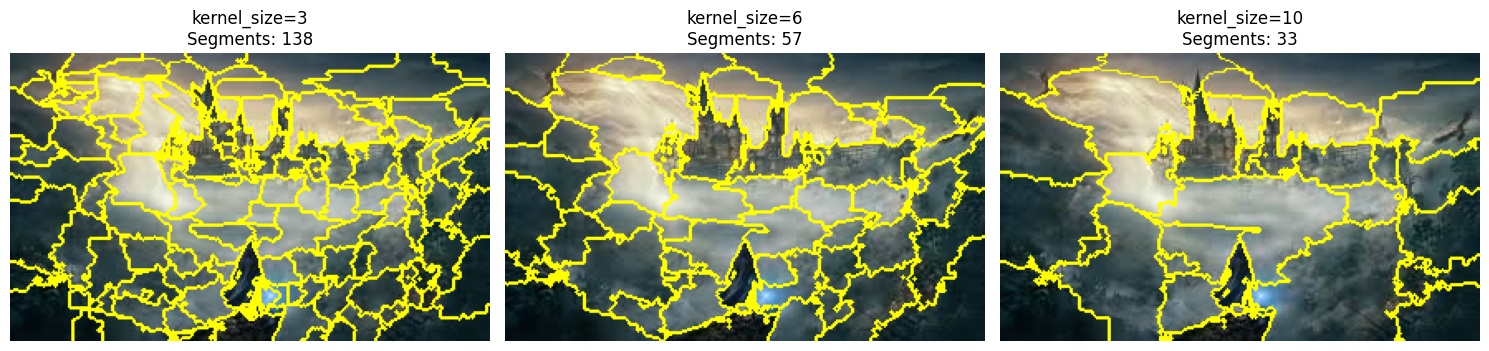

In [7]:
from skimage.segmentation import quickshift


def explore_quickshift_params(image, kernel_sizes):
    """
    Function to explore the effect of kernel_size variations in Quickshift segmentation.

    Parameters:
    - image: Input image (numpy array).
    - kernel_sizes: List of kernel_size values to test.

    Outputs:
    - Displays the segmented images with boundaries and prints the number of segments for each kernel_size.
    """
    # Convert to float for Quickshift
    image_float = img_as_float(image)

    fig, axs = plt.subplots(1, len(kernel_sizes), figsize=(15, 5))

    for i, kernel_size in enumerate(kernel_sizes):
        # Apply Quickshift segmentation with varying kernel_size
        segments = quickshift(image_float, kernel_size=kernel_size, max_dist=10, ratio=1.0)

        # Count the number of segments
        num_segments = len(np.unique(segments))

        # Plot the segmented image with boundaries
        axs[i].imshow(mark_boundaries(image, segments))
        axs[i].set_title(f"kernel_size={kernel_size}\nSegments: {num_segments}")
        axs[i].axis('off')

        # Print the number of segments
        print(f"Kernel_size={kernel_size} -> Segments: {num_segments}")

    plt.tight_layout()
    plt.show()

# Example usage with the Hogwarts image
kernel_sizes = [3, 6, 10]
explore_quickshift_params(hogwarts_image, kernel_sizes)


h) Comment what the algorithm is (in up to 3 lines).

- Quickshift is a segmentation algorithm based on kernel density estimation in feature space, which groups pixels by finding dense regions (modes) in the data. It considers both spatial proximity and pixel intensity/color similarity, controlled by parameters like kernel_size, max_dist, and ratio. This makes it particularly effective for detecting local features and segmenting smooth or textured areas, but it may struggle with complex boundaries or high-resolution images due to its computational cost.

### Comparison of segmentation algorithms

Apply the best set of parameters of each algorithm and apply it to:
1) Original image
1) Salt and pepper noise version of this image
2) Flipped image (horizontally)
3) Canny edge detector result of this image.

Plot the image and its results of fezenswalb and SLIC algorithm in a 1x3 subplots.

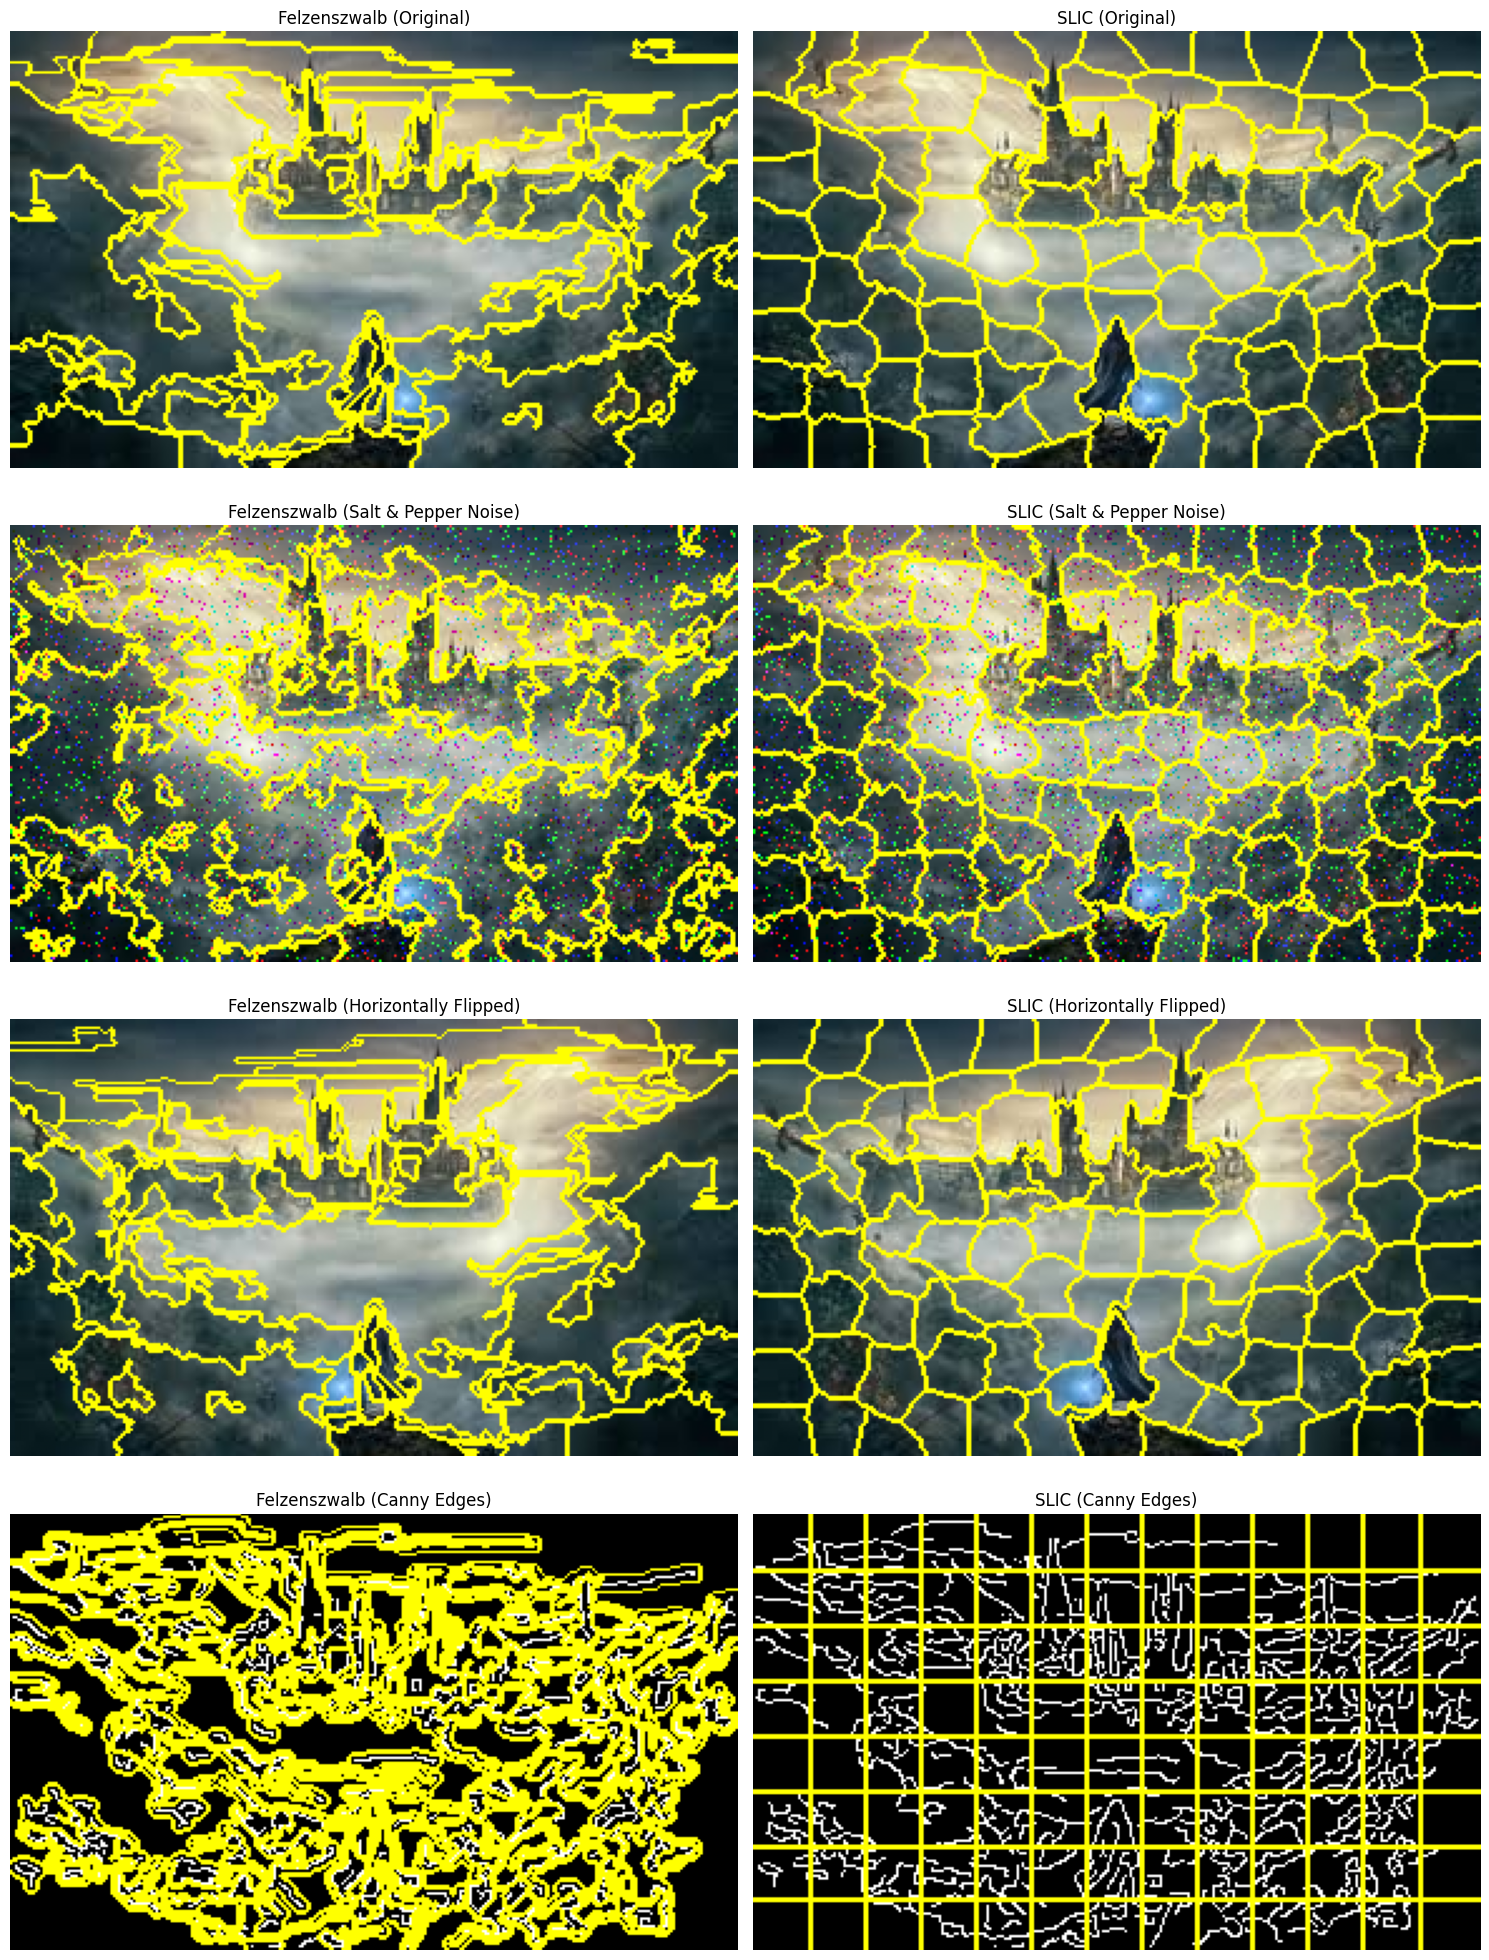

In [8]:
from skimage.util import random_noise
from skimage.feature import canny
from skimage.color import rgb2gray

def apply_algorithms_comparison(image, best_params_felzenszwalb, best_params_slic):
    # Transformations
    noisy_image = random_noise(image, mode='s&p')
    flipped_image = np.fliplr(image)
    edges = canny(rgb2gray(image))

    images = [image, noisy_image, flipped_image]
    titles = ["Original", "Salt & Pepper Noise", "Horizontally Flipped"]

    fig, axes = plt.subplots(4, 2, figsize=(15, 20))

    for i, img in enumerate(images):
        # Felzenszwalb
        segments_felzenszwalb = felzenszwalb(img, scale=best_params_felzenszwalb['scale'], sigma=best_params_felzenszwalb['sigma'], min_size=best_params_felzenszwalb['min_size'])
        axes[i, 0].imshow(mark_boundaries(img, segments_felzenszwalb))
        axes[i, 0].set_title(f"Felzenszwalb ({titles[i]})")
        axes[i, 0].axis('off')

        # SLIC
        segments_slic = slic(img_as_float(img), n_segments=best_params_slic['n_segments'], compactness=best_params_slic['compactness'], sigma=best_params_slic['sigma'], channel_axis=-1)
        axes[i, 1].imshow(mark_boundaries(img, segments_slic))
        axes[i, 1].set_title(f"SLIC ({titles[i]})")
        axes[i, 1].axis('off')

    # Canny edge detector result
    segments_felzenszwalb_edges = felzenszwalb(edges, scale=best_params_felzenszwalb['scale'], sigma=best_params_felzenszwalb['sigma'], min_size=best_params_felzenszwalb['min_size'])
    axes[3, 0].imshow(mark_boundaries(edges, segments_felzenszwalb_edges), cmap='gray')
    axes[3, 0].set_title("Felzenszwalb (Canny Edges)")
    axes[3, 0].axis('off')

    segments_slic_edges = slic(img_as_float(edges), n_segments=best_params_slic['n_segments'], compactness=best_params_slic['compactness'], sigma=best_params_slic['sigma'], channel_axis=None)
    axes[3, 1].imshow(mark_boundaries(edges, segments_slic_edges), cmap='gray')
    axes[3, 1].set_title("SLIC (Canny Edges)")
    axes[3, 1].axis('off')

    plt.tight_layout()
    plt.show()

# Example parameters for Felzenszwalb and SLIC
best_params_felzenszwalb = {
    'scale': 100, 'sigma': 0.8, 'min_size': 50
}

best_params_slic = {
    'n_segments': 100, 'compactness': 20, 'sigma': 1
}

# Call the function
apply_algorithms_comparison(hogwarts_image, best_params_felzenszwalb, best_params_slic)




##### Do the transformations affect the segmentation? Why or why not?
- The transformations applied do affect the segmentation results. For example, salt-and-pepper noise introduces random variations in pixels, which can cause the algorithms to generate additional segments in areas where there was uniformity before. In the case of the horizontally flipped image, the segmentation does not change significantly because local properties, such as color and texture, remain intact. For edge transformation with Canny, the segmentation is reduced to working only with the main structures, which can give very different results, depending on the complexity of the edges.
##### Can the number of segments can be used as a criterion for the performance of the algorithms?
- The number of segments can be a useful indicator of algorithm performance, but it is not an absolute criterion. A high number of segments might reflect high sensitivity to detail, but does not always imply good segmentation if the results are too fragmented. On the other hand, a low number of segments could indicate good clustering, but may also miss important information. Therefore, the number of segments should be evaluated along with the visual quality and the specific purpose of the analysis.

## 3.2 Segmentation via clustering

In this exercise, you will implement hierarchical clustering to segment the "images_notebook/groot.png" image in gray scales. First load and visualize the image, then implement hierarchical clustering over the pixels and plot the final results side by side to the original image

Hint: Sklearn has a hierarchical clustering implementation you should use. Reshape your dataset such that you have a 2 dimensional array. Use linkage "ward" and grid_to_graph function for the connectivity parameter.

<img src="images_notebook/loro_segmentation.jpg" width=600>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

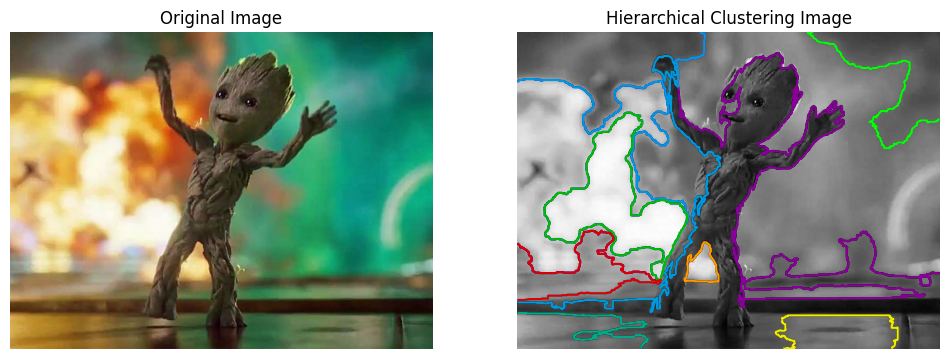

AttributeError: 'NoneType' object has no attribute 'remove_callback'

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

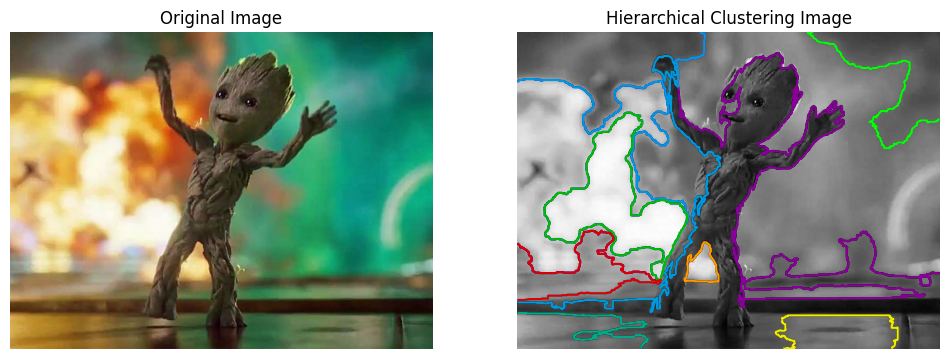

In [14]:
%matplotlib inline

from skimage import io
from skimage.color import rgb2gray
from sklearn.cluster import AgglomerativeClustering
from sklearn.feature_extraction.image import grid_to_graph
import matplotlib.pyplot as plt
import numpy as np

# Load and preprocess the image
img = io.imread('images/groot.jpg')  # Update path as needed

# GrayScale Image
gray_img = rgb2gray(img)

#Take the shape of original image
X = np.reshape(gray_img, (-1, 1))

#Connectivity using grid_to_graph
connectivity = grid_to_graph(*gray_img.shape)

#Number of regions
n_clusters = 10

#Use agglomerativeClustering for use ward and grid_to_graph
ward = AgglomerativeClustering(
    n_clusters=n_clusters, linkage="ward", connectivity=connectivity
).fit(X)

#Reshape the image with agglomerative
label = np.reshape(ward.labels_, gray_img.shape)

# ORIGINAL IMAGE
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.axis('off')
plt.title("Original Image")

#HIERARCHICAL CLUSTERING IMAGE
plt.subplot(1, 2, 2)
plt.imshow(gray_img, cmap='gray')
#For all clusters, paint the segmentation
for l in range(n_clusters):
    plt.contour(
        label == l,
        colors=[
            plt.cm.nipy_spectral(l / float(n_clusters)),
        ],
    )
plt.title("Hierarchical Clustering Image")
plt.axis('off')
plt.show()

## Video segmentation

Given the video stored in ‘Barcelona-sequence’, which contains images acquired by a static camera, we ask you to:
- Find the temporal segments of the video (shots). Where the scene change? (Section 3.1)
- Extract the background images and thus, remove all the "artifacts" considered as foreground related to movement. (Section 3.2)

<img src="images_notebook/screenshot.png" width=600>

## 3.3 Segmentation of video shots

Read and visualize the sequence of images "images_notebook/Barcelona-sequence".

**Hint:** In order to read a collection of images, we wil use the function [animation.FuncAnimation](https://matplotlib.org/2.0.0/api/_as_gen/matplotlib.animation.FuncAnimation.html). Observe in the following Example, how FuncAnimation is used to read and visualize a sequence of frames. Explore the parameters of animation.FuncAnimation().

In [25]:

%matplotlib nbagg

import matplotlib.pyplot as plt
import matplotlib.animation as animation
from skimage import io

# Load the image sequence
ic = io.ImageCollection('images_notebook/Barcelona-sequence/*.png')

# Set up the figure and initialize the first image
fig = plt.figure()
im = plt.imshow(ic[0], animated=True)  # Visualize the first image

# Initialize the animation
def init():
    im.set_array(ic[0])  # Display the first frame
    return im,  # Return a tuple

# Update function for the animation
def updatefig1(i):
    im.set_array(ic[i])  # Update the frame with the current image
    return im,  # Return a tuple
plt.show()
# Create the animation
ani = animation.FuncAnimation(
    fig,
    updatefig1,
    init_func=init,  # Initialize the first frame
    frames=len(ic),  # Number of frames (based on images in the collection)
    interval=100,  # Time between frames in milliseconds
    blit=True,
    repeat=False,
)

# Save the animation as a GIF
ani.save("Barcelona-sequence.gif", writer="pillow", fps=10)

# Show the animation
plt.show()



<IPython.core.display.Javascript object>

a) Find where a shot (scene) finishes and the following starts (the shot boundaries). To achieve this goal, we are going to compute the difference between the histograms of consecutive frames. The proposed solution required:

- Compute the histogram for each RGB channel

- The 'total' histogram of the image is computed as the sum of the three histograms

- Compute the mean of the difference (in absolute value) between the histograms of two consecutive frames

Those differences with largest values corresponds to the transitions between shots.

Therefore, **we need to create a funtion which return an array with the differences between histograms. We will plot the resulting array in order to localice the maximum values as well as a suitable threshold to define localize the transitions.**

<img src="images_notebook/histogramshot.png" width=600>
<img src="images_notebook/difference_histograms.png">

To solve this exercise, you need to create a **temporal plot** showing a frame by frame difference measure to be defined by you, being applicable to distinguish the shots. Define a criterion to detect the boundaries of the shots and visualize it in a static plot.

The plot above was obtain by using 64 bins histogram and the measure as mean of absolute difference.

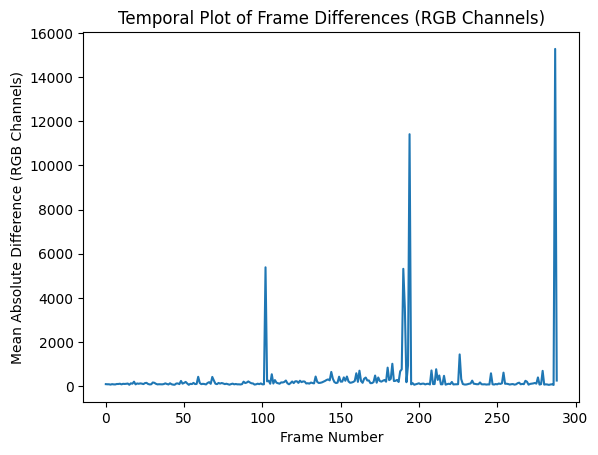

In [32]:
from skimage import img_as_float
from skimage.exposure import histogram
import numpy as np
import matplotlib.pyplot as plt

# Function to compute the histogram of an image
def image2histogram(image, nbins=64):
    """
    Converts an image to a combined histogram representation.

    Parameters:
        image (array): Input RGB image.
        nbins (int): Number of bins for the histogram.

    Returns:
        float: Sum of the histograms for the R, G, and B channels.
    """
    image = img_as_float(image)  # Convert image to float [0, 1]
    # Compute and sum histograms for each RGB channel
    histograms = [histogram(image[:, :, c], nbins=nbins)[0] for c in range(3)]
    return sum(histograms)

# Function to calculate the mean absolute difference between consecutive frames
def frame_mean(images):
    """
    Computes the mean absolute difference of histograms between consecutive frames.

    Parameters:
        images (list of arrays): List of RGB images.

    Returns:
        list of float: Mean absolute differences between consecutive frames.
    """
    mean_diff_values = []
    for i in range(len(images) - 1):
        # Compute histograms for the current and next frame
        current_hist = image2histogram(images[i])
        next_hist = image2histogram(images[i + 1])
        # Compute the absolute difference between histograms
        difference = np.abs(current_hist - next_hist)
        # Compute the mean of the difference
        mean_diff = np.mean(difference)
        mean_diff_values.append(mean_diff)

    return mean_diff_values

# Function to plot the mean differences between frames
def temporal_plot_frame_by_frame(images):
    """
    Plots the mean absolute difference between consecutive frames.

    Parameters:
        images (list of arrays): List of RGB images.
    """
    # Compute mean differences
    mean_diff_values = frame_mean(images)
    # Plot the results
    plt.plot(mean_diff_values)
    plt.xlabel('Frame Number')
    plt.ylabel('Mean Absolute Difference (RGB Channels)')
    plt.title('Temporal Plot of Frame Differences (RGB Channels)')
    plt.show()

# Run the function on the image collection
temporal_plot_frame_by_frame(ic)



b) Additionally, create an interactive plot executing the following code in "Example A". Substitute the bottom plot with the temporal plot showing the differences between the consecutive frames.

In [33]:
# Example A
def data_gen():
    return enumerate(mean_differences)

In [36]:
%matplotlib nbagg

def data_gen():
    t = data_gen.t
    cnt = 0
    mean = 0
    for i in range(len(ic) - 1):
        hist = image2histogram(ic[cnt])
        hist2 = image2histogram(ic[cnt+1])
        #Calculate the difference between the consecutive frames
        difference = [np.abs(hist - hist2)]
        mean = np.mean(difference)
        cnt += 1
        t += 0.05
        y = mean
        yield t, y

data_gen.t = 0
%matplotlib nbagg

#PLOT THE HISTOGRAM
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
#Do the line red
line, = plt.plot([], [], lw=2, color='r')
#Use the max and minimum of the other exercise
plt.ylim(-1.1, 16000)
plt.xlim(0, 20)
plt.grid()

xdata, ydata = [], []

def run(data):
    t, y = data
    xdata.append(t)
    ydata.append(y)
    #PLOT THE VIDEO
    plt.subplot(1, 2, 1)
    plt.imshow(ic[len(xdata)])

    xmin, xmax = plt.xlim()
    if t >= xmax:
        plt.xlim(xmin, 2 * xmax)
        fig.canvas.draw()

    #Update data of both line objects
    line.set_data(xdata, ydata)

    return line

ani = animation.FuncAnimation(fig, run, data_gen, blit=True, interval=10, repeat=False, cache_frame_data=False)

plt.show()

<IPython.core.display.Javascript object>

c) Show the initial and final images of each shot extracted as follows:

<img src="images_notebook/result_shot_detection.png">


Use the previous plot to define the proper threshold value over the differences of histograms. Use the threshold to localize indexes of the array returned by the function proposed in the previous question and, therefore, localize the initial and final frames for each shot as shown in the reference image


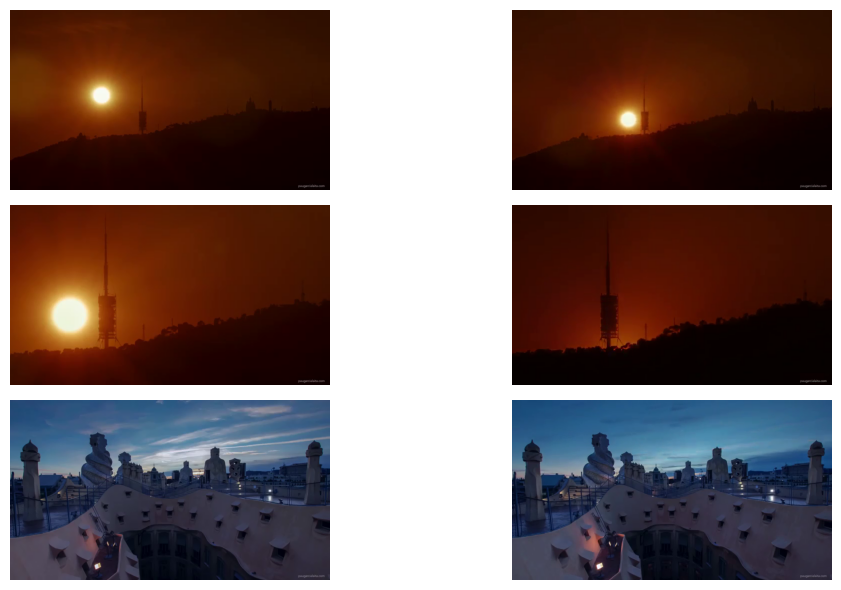

In [53]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Identify scene changes based on histogram differences
def get_scenes(images, threshold=5350):
    """
    Detects scene changes in a sequence of images by comparing histograms.

    Parameters:
        images (list of arrays): List of RGB images.
        threshold (float): Threshold for mean histogram difference to detect a scene change.

    Returns:
        list of int: Indices of images where scene changes occur.
    """
    scenes = [0]  # Start with the first frame as a scene
    for i in range(len(images) - 1):
        # Calculate histogram differences between consecutive frames
        initial_frame = image2histogram(images[i])
        final_frame = image2histogram(images[i + 1])
        difference = np.abs(initial_frame - final_frame)

        # Add scene indices if difference exceeds threshold
        if np.mean(difference) > threshold:
            scenes.append(i)
            scenes.append(i + 1)

    # Ensure an even number of indices for pairing scenes
    if len(scenes) % 2 != 0:
        scenes.pop()

    # Save the first frame of each scene as a PNG image
    if not os.path.exists('scenes'):
        os.makedirs('scenes')

    for idx, scene in enumerate(scenes):
        plt.imshow(images[scene])
        plt.axis('off')
        plt.savefig(f'scenes/scene{idx + 1}.png', bbox_inches='tight')
        plt.close()

    return scenes

# Visualize detected scenes
def show_scenes(scenes, images):
    """
    Displays images corresponding to detected scenes.

    Parameters:
        scenes (list of int): Indices of scene-change frames.
        images (list of arrays): List of RGB images.
    """
    plt.figure(figsize=(12, 6))
    for idx, scene in enumerate(scenes):
        # Create subplot for each scene
        plt.subplot((len(scenes) + 1) // 2, 2, idx + 1)
        plt.axis('off')
        plt.imshow(images[scene])
    plt.tight_layout()
    plt.show()

# Run the scene detection and visualization
scenes = get_scenes(ic)
show_scenes(scenes, ic)



d) Which measure have you used in order to visually distinguish the shots in a plot? Explain your solution.

We have used the mean absolute difference between the histograms of the three color channels (R, G, B) for each frame and its subsequent frame. By comparing these histograms, we can identify significant changes in the scene. For this, we used 64 bins for the histograms and set a threshold value of 5350. Frames with a mean difference above this threshold are considered as the beginning or end of a shot. This method allows us to visually distinguish shots effectively.

e) Would your video segmentation strategy be able to separate and track objects? Argue your answer.

No, this method cannot separate and track objects because it focuses on detecting changes in the scene by comparing histograms of consecutive frames. While it can identify scene transitions, it does not analyze specific objects within the frames. Additionally, if the video has smooth transitions or minimal changes between frames (e.g., a gradual fade or panning), the histogram differences might be too small to detect, and the method would fail to identify these transitions or track objects effectively.


f) Would your video segmentation strategy be able to capture continuous transition? Argue your answer.

No, as explained in part e), if the video has a continuous transition, such as a gradual fade or a smooth motion, the differences between consecutive frames would be minimal. Our method, which relies on detecting significant changes in histograms, would not be sensitive enough to capture these subtle transitions. As a result, it would fail to identify the segmentation points in such cases. The method is more effective for detecting abrupt scene changes, not continuous or gradual transitions.

## 3.4 Background subtraction

Apply the background subtraction algorithm (check theory material).

<img src="images_notebook/screenshot2.png" width=500>

a) Visualize the following images for each different scene of the video:

    1) an image belonging to the shot
    2) the background image, and
    3) the foreground.
    
**Hint**: You can construct a mask obtained from the original image and the background in order to know which parts of the image form part from the foreground and recover from the original image just the foreground regions.

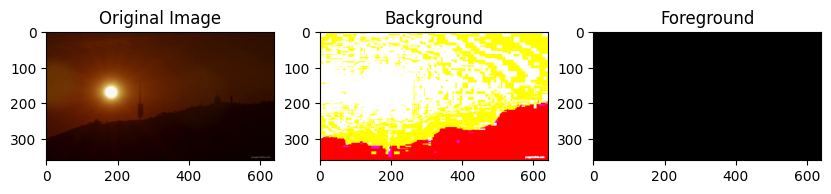

In [47]:
# Your solution here
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Create figure and subplots for visualizing the images
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 3))
axes = [ax1, ax2, ax3]

# Visualize the first image (original)
im = ax1.imshow(ic[0])
ax1.set_title('Original Image')

# Initialize background as the first frame
background = ic[0]
im_bg = ax2.imshow(background)
ax2.set_title('Background')

# Initialize foreground as an empty image (zeros)
foreground = np.zeros_like(ic[0])
im_fg = ax3.imshow(foreground)
ax3.set_title('Foreground')

# Function to update figures for each frame
def updatefig1(i):
    global background
    global foreground

    # Apply background subtraction: Calculate absolute difference from the background
    diff = np.abs(ic[i] - background)

    # Threshold to identify foreground: Pixels with difference > threshold
    threshold = 30
    foreground = np.where(diff > threshold, ic[i], 0)

    # Update background using a running average (alpha controls speed of adaptation)
    alpha = 0.1  # Smaller alpha = slower adaptation
    background = (1 - alpha) * background + alpha * ic[i]

    # Update images with the current frame, background, and foreground
    im.set_array(ic[i])
    im_bg.set_array(background)
    im_fg.set_array(foreground)

    return im, im_bg, im_fg

# Set up animation: Update images every 100 ms, iterate through all frames in 'ic'
ani = animation.FuncAnimation(fig, updatefig1, interval=100, blit=True, frames=len(ic), repeat=False)

# Display the animation
plt.show()


b) What do the static background images represent?

The static background images represent the scene without any moving objects or foreground activity. They capture the unchanging elements of the environment, which can then be used for comparison to detect changes (i.e., foreground objects or movement).


c) What happens if the shots are not correctly extracted? And, what happens if you find too many shots in the video?

If the shots are not correctly extracted, the background subtraction algorithm may fail to effectively isolate moving objects or foreground activity, leading to false positives (incorrectly detecting movement where there is none) or false negatives (failing to detect real movement). If too many shots are detected in the video, it could indicate an over-sensitive threshold or an inability to differentiate between gradual scene changes and actual movement, leading to fragmentation and possibly making it difficult to track continuous objects.

d) What happens if you subtract the background image from the original one?

When you subtract the background image from the original one, you get the foreground image. This process highlights the pixels that have changed between the current frame and the static background, allowing you to identify moving objects or areas of activity in the scene.

e) In which situations does the algorithm work and in which it does not? Do you see any additional application for this algorithm?

The algorithm works well in scenarios where the background remains relatively static and distinct moving objects are present in the scene. It may struggle, however, in situations where there are gradual changes or subtle movements, such as smooth transitions, shadows, or minor changes in lighting. An additional application for this algorithm could be in surveillance systems, where identifying moving objects against a static background is crucial. It could also be used in video editing for background removal or in robotics for motion detection.

f) Visualize the highest and lowest similarity frame with respect to the foreground images of each scene. You can use the metric of your like, explain why you picked it.

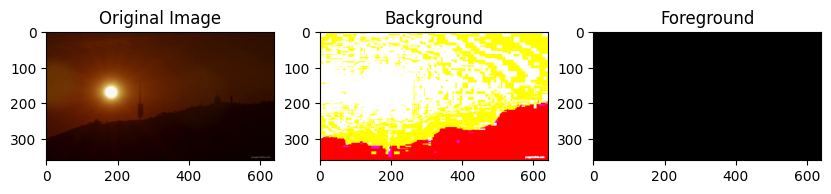

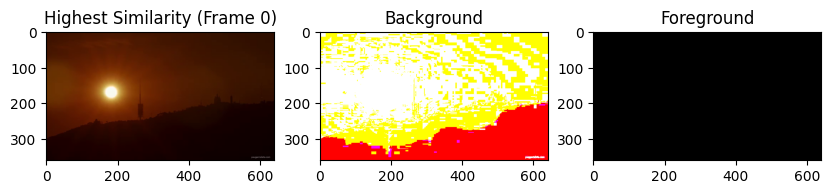

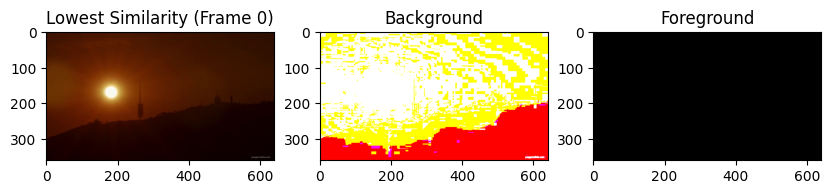

In [57]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from skimage.metrics import structural_similarity as ssim

# Create figure and subplots for visualizing the images
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 3))
axes = [ax1, ax2, ax3]

# Visualize the first image (original)
im = ax1.imshow(ic[0])
ax1.set_title('Original Image')

# Initialize background as the first frame
background = ic[0]
im_bg = ax2.imshow(background)
ax2.set_title('Background')

# Initialize foreground as an empty image (zeros)
foreground = np.zeros_like(ic[0])
im_fg = ax3.imshow(foreground)
ax3.set_title('Foreground')

# Initialize similarity scores for each frame
similarity_scores = []

# Function to update figures for each frame
def updatefig1(i):
    global background
    global foreground
    global similarity_scores

    # Apply background subtraction: Calculate absolute difference from the background
    diff = np.abs(ic[i] - background)

    # Threshold to identify foreground: Pixels with difference > threshold
    threshold = 30
    foreground = np.where(diff > threshold, ic[i], 0)

    # Update background using a running average (alpha controls speed of adaptation)
    alpha = 0.1  # Smaller alpha = slower adaptation
    background = (1 - alpha) * background + alpha * ic[i]

    # Update images with the current frame, background, and foreground
    im.set_array(ic[i])
    im_bg.set_array(background)
    im_fg.set_array(foreground)

    # Calculate SSIM similarity score between the current frame and the foreground
    # Set win_size=3 to avoid error with small images
    ssim_score = ssim(foreground, ic[i], multichannel=True, win_size=3)
    similarity_scores.append(ssim_score)

    return im, im_bg, im_fg

# Set up animation: Update images every 100 ms, iterate through all frames in 'ic'
ani = animation.FuncAnimation(fig, updatefig1, interval=100, blit=True, frames=len(ic), repeat=False)

# Display the animation
plt.show()

# After the animation, find the highest and lowest similarity scores
highest_similarity_index = np.argmax(similarity_scores)
lowest_similarity_index = np.argmin(similarity_scores)

# Visualize the highest and lowest similarity frames
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 3))
axes = [ax1, ax2, ax3]

# Show the highest similarity frame
im = ax1.imshow(ic[highest_similarity_index])
ax1.set_title(f'Highest Similarity (Frame {highest_similarity_index})')

# Show the background
im_bg = ax2.imshow(background)
ax2.set_title('Background')

# Show the foreground
im_fg = ax3.imshow(foreground)
ax3.set_title('Foreground')

plt.show()

# Show the lowest similarity frame
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 3))
axes = [ax1, ax2, ax3]

# Show the lowest similarity frame
im = ax1.imshow(ic[lowest_similarity_index])
ax1.set_title(f'Lowest Similarity (Frame {lowest_similarity_index})')

# Show the background
im_bg = ax2.imshow(background)
ax2.set_title('Background')

# Show the foreground
im_fg = ax3.imshow(foreground)
ax3.set_title('Foreground')

plt.show()

